In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# option d'affichage des résultats
pd.set_option("display.max_row",130)
pd.set_option("display.max_columns",100)

In [ ]:
# noms des variables de notre dataset y compris la variable identifiant IRIS
colonnes =["IDENT","TypeHabi", "GeoFaz_Scl", "GeoFaz_cl","Anciennete","Doublon_ligne",
            "Revenus_iris","Sexe","Prenom_Phase_scl_H", "Prenom_Phase_scl_F","Prenom_Phase_cl_H",
           "Prenom_Phase_cl_F","Age_H","Age_F","Pays_sud","Prenom_effectif","codif_RdB","Flag_PA",
           "Annee_1er_don","Cumul_dons","Don_max","Don_moyen","Vingtiles_ISF","IFI+"]
#colonnes = ["IRIS","%C17_MENPSEUL","%C17_MENCOUPSENF","%C17_MENFAMMONO","%C17_PMEN_MENPSEUL","%P17_POP1524","%P17_POP2554","%P17_POP5579","%P17_POP80P","%P17_POP15P_PACSEE","%P17_POP15P_CONCUB_UNION_LIBRE","%P17_POP15P_VEUFS","%P17_POP15P_DIVORCEE","%P17_POP15P_CELIBATAIRE","%C17_MEN_CS1","%C17_MEN_CS2","%C17_MEN_CS3","%C17_MEN_CS4","%C17_MEN_CS5","%C17_MEN_CS6","%C17_MEN_CS7","%C17_MEN_CS8","%C17_NE24F0","%C17_NE24F4P","%P17_ACT1564","%P17_ACT1524","%P17_CHOM1564","%P17_CHOM1524","%P17_ETUD1564","%P17_AINACT1564","%P17_SAL15P","%P17_NSAL15P","%P17_SAL15P_CDI","%P17_SAL15P_EMPAID","%P17_NSAL15P_INDEP","%P17_ACTOCC15P_ILT1","%P17_ACTOCC15P_ILT2P","%C17_ACTOCC15P_VOIT","%C17_ACTOCC15P_TCOM","%P17_POP0205","%P17_SCOL0205","%P17_NSCOL15P_DIPLMIN","%P17_NSCOL15P_CAPBEP","%P17_NSCOL15P_BAC","%P17_NSCOL15P_SUP5","%P16_RP","%P16_RSECOCC","%P16_MAISON","%P16_APPART","%P16_RP_5P","%P16_RP_120P","%P16_RP_ACH19","%P16_RP_ACH45","%P16_RP_ACH70","%P16_RP_ACH90","%P16_RP_ACH05","%P16_RP_ACH13","%P16_PMEN_ANEM0002","%P16_PMEN_ANEM0204","%P16_PMEN_ANEM0509","%P16_PMEN_ANEM10P","%P16RP_PROP","%P16RP_LOC","%P16RP_LOCHLMV","%P16RP_CLIM","%P16RP_GARL","%P16RP_VOIT1","%P16RP_VOIT2P","%P16_POP_ETR","%P16_POP_IMM"]

In [ ]:
# importation du fichier (changer le chemin d'accès)
''' Faites attention au type de fichier, au délimiteur des valeurs (ça doit être unique et non multiple),
au header et à la lecture des types d'objets (low_memory) '''
data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')

#data_orig = pd.read_csv("C:/Users/Christian/Desktop/input_texte.txt",delim_whitespace="\t" , header = None, names=colonnes, low_memory=False, )#, dtype='Int64')

In [ ]:
''' copie superficielle (peu profonde) du dataset original pour ne pas modifier les valeurs
d'origine par erreur plus tard 
'''
data = data_orig.copy()
data.shape

(484522, 24)

In [ ]:
# visualisation des premiers lignes
data.head()

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
0,0000000101001347,03,75,07,08,03,03,03,64,46,06,04,09,04,02,03,03,02,07,07,06,04,10,2
1,0000000201001512,01,74,07,05,03,03,04,65,81,06,08,11,12,02,04,03,02,08,05,02,02,10,2
2,0000000301002801,02,32,03,07,02,04,04,66,66,06,06,11,09,02,03,03,02,08,07,05,03,07,2
3,0000000401003186,01,12,01,04,03,07,03,51,81,05,08,09,12,02,05,01,02,02,07,08,06,18,2
4,0000000501003624,02,12,01,06,03,03,03,51,81,05,08,09,12,02,05,01,02,08,07,08,06,02,2


In [ ]:

data2 = data
#for i in range(data2.shape[0]):
#  data2.iloc[i,0]= str(i+1).zfill(8)
data2 

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
0,0000000101001347,03,75,07,08,03,03,03,64,46,06,04,09,04,02,03,03,02,07,07,06,04,10,2
1,0000000201001512,01,74,07,05,03,03,04,65,81,06,08,11,12,02,04,03,02,08,05,02,02,10,2
2,0000000301002801,02,32,03,07,02,04,04,66,66,06,06,11,09,02,03,03,02,08,07,05,03,07,2
3,0000000401003186,01,12,01,04,03,07,03,51,81,05,08,09,12,02,05,01,02,02,07,08,06,18,2
4,0000000501003624,02,12,01,06,03,03,03,51,81,05,08,09,12,02,05,01,02,08,07,08,06,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484517,0048451804239260,02,75,07,07,02,02,01,51,64,05,06,08,09,02,01,01,02,15,08,09,07,03,NaN
484518,0048451904239261,02,14,01,04,03,03,04,55,54,05,05,08,05,01,01,04,02,15,08,09,07,07,NaN
484519,0048452004239262,02,63,06,10,02,03,04,51,81,05,08,09,12,02,05,03,02,15,08,09,07,10,NaN
484520,0048452104239263,02,11,01,03,02,04,04,51,66,05,06,09,09,02,05,03,02,15,08,09,07,08,NaN


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484522 entries, 0 to 484521
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IDENT               484522 non-null  object
 1   TypeHabi            484522 non-null  object
 2   GeoFaz_Scl          484522 non-null  object
 3   GeoFaz_cl           484522 non-null  object
 4   Anciennete          484522 non-null  object
 5   Doublon_ligne       484522 non-null  object
 6   Revenus_iris        484522 non-null  object
 7   Sexe                484522 non-null  object
 8   Prenom_Phase_scl_H  484522 non-null  object
 9   Prenom_Phase_scl_F  484522 non-null  object
 10  Prenom_Phase_cl_H   484522 non-null  object
 11  Prenom_Phase_cl_F   484522 non-null  object
 12  Age_H               484522 non-null  object
 13  Age_F               484522 non-null  object
 14  Pays_sud            484522 non-null  object
 15  Prenom_effectif     484522 non-null  object
 16  co

In [ ]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff

In [ ]:
dff= nombre_mod(data2) 
dff

,VARIABLE,NOMBRE_MOD,NOMBRE_MOD_SANS_NA
0,IDENT,484522,484522
1,TypeHabi,4,4
2,GeoFaz_Scl,38,38
3,GeoFaz_cl,8,8
4,Anciennete,11,11
5,Doublon_ligne,3,3
6,Revenus_iris,8,8
7,Sexe,5,5
8,Prenom_Phase_scl_H,31,31
9,Prenom_Phase_scl_F,45,45


In [ ]:
#visualisation du dataframe par l'ordre
dff.sort_values(by="NOMBRE_MOD")

,VARIABLE,NOMBRE_MOD,NOMBRE_MOD_SANS_NA
17,Flag_PA,2,2
14,Pays_sud,2,2
23,IFI+,3,2
5,Doublon_ligne,3,3
1,TypeHabi,4,4
16,codif_RdB,5,5
7,Sexe,5,5
15,Prenom_effectif,6,6
21,Don_moyen,7,7
10,Prenom_Phase_cl_H,7,7


In [ ]:
data2

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
0,0000000101001347,03,75,07,08,03,03,03,64,46,06,04,09,04,02,03,03,02,07,07,06,04,10,2
1,0000000201001512,01,74,07,05,03,03,04,65,81,06,08,11,12,02,04,03,02,08,05,02,02,10,2
2,0000000301002801,02,32,03,07,02,04,04,66,66,06,06,11,09,02,03,03,02,08,07,05,03,07,2
3,0000000401003186,01,12,01,04,03,07,03,51,81,05,08,09,12,02,05,01,02,02,07,08,06,18,2
4,0000000501003624,02,12,01,06,03,03,03,51,81,05,08,09,12,02,05,01,02,08,07,08,06,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484517,0048451804239260,02,75,07,07,02,02,01,51,64,05,06,08,09,02,01,01,02,15,08,09,07,03,NaN
484518,0048451904239261,02,14,01,04,03,03,04,55,54,05,05,08,05,01,01,04,02,15,08,09,07,07,NaN
484519,0048452004239262,02,63,06,10,02,03,04,51,81,05,08,09,12,02,05,03,02,15,08,09,07,10,NaN
484520,0048452104239263,02,11,01,03,02,04,04,51,66,05,06,09,09,02,05,03,02,15,08,09,07,08,NaN


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# data_sans_nan = data2 # un autre fichier (à éliminer après)

# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
# on remplace les individus n'ayant pas d'étiquette pour IFI+ par '2' (non donateurs)
"""IMPORTANT"""

#data2["IFI+"] = data2["IFI+"].fillna('2')
# élimination des variables qui ont moins de 3 modalités pour ne pas obtenir après la discrétisation
# des variables avec une seule modalité, ce qui pose un problème lors de l'ACM
data2 = data2.drop(["Flag_PA","Pays_sud","IFI+"], axis = 1)
colonnes = data2.columns
# comme il n'y pas de valeurs manquantes, ca ne sert pas
data_sans_nan = data2[(data2.isnull()).sum(axis=1) == 0] 


In [ ]:
# transformation des valeurs float en int
data_sans_nan.iloc[:,1:] = data_sans_nan.iloc[:,1:].astype(int)
data_sans_nan

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Prenom_effectif,codif_RdB,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF
0,0000000101001347,3,75,7,8,3,3,3,64,46,6,4,9,4,3,3,7,7,6,4,10
1,0000000201001512,1,74,7,5,3,3,4,65,81,6,8,11,12,4,3,8,5,2,2,10
2,0000000301002801,2,32,3,7,2,4,4,66,66,6,6,11,9,3,3,8,7,5,3,7
3,0000000401003186,1,12,1,4,3,7,3,51,81,5,8,9,12,5,1,2,7,8,6,18
4,0000000501003624,2,12,1,6,3,3,3,51,81,5,8,9,12,5,1,8,7,8,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484517,0048451804239260,2,75,7,7,2,2,1,51,64,5,6,8,9,1,1,15,8,9,7,3
484518,0048451904239261,2,14,1,4,3,3,4,55,54,5,5,8,5,1,4,15,8,9,7,7
484519,0048452004239262,2,63,6,10,2,3,4,51,81,5,8,9,12,5,3,15,8,9,7,10
484520,0048452104239263,2,11,1,3,2,4,4,51,66,5,6,9,9,5,3,15,8,9,7,8


In [ ]:
nombre_mod(data_sans_nan)

,VARIABLE,NOMBRE_MOD,NOMBRE_MOD_SANS_NA
0,IDENT,484522,484522
1,TypeHabi,4,4
2,GeoFaz_Scl,38,38
3,GeoFaz_cl,8,8
4,Anciennete,11,11
5,Doublon_ligne,3,3
6,Revenus_iris,8,8
7,Sexe,5,5
8,Prenom_Phase_scl_H,31,31
9,Prenom_Phase_scl_F,45,45


In [ ]:
# discrétisation des variables continues (les valeurs manquantes doivent être gérées en amont)
''' c'est qui est bien avec KBinsDiscretizer est qu'il s'adapte aux éventuelles partitions au
sein d'une variable. En d'autres termes, si la méthode n'arrive pas à partitionner les individus
en k partitions, alors elle esssayera de les partitionner en k-1 partitions, et ainsi de suite, 
jusqu'à atteindre 1 partition (il faut faire attention avec les variables ayant uniquement 
une modalité). Lorsque la méthode rencontre ce cas, elle affichera "UserWaring" pour informer 
l'utilisateur de celui-ci ainsi que les variables concernées. Ceci sera utile plus tard.
'''
method_discre = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') 
method_discre.fit(data_sans_nan.iloc[:,1:])
resultat_discre = method_discre.transform(data_sans_nan.iloc[:,1:])
resultat_discre

C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Christian\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature

array([[1., 3., 3., ..., 3., 2., 1.],
       [0., 3., 3., ..., 1., 1., 1.],
       [1., 1., 1., ..., 2., 2., 1.],
       ...,
       [1., 2., 2., ..., 3., 3., 1.],
       [1., 0., 0., ..., 3., 3., 1.],
       [1., 1., 1., ..., 3., 3., 1.]])

In [ ]:
# construction du data frame après discrétisation
data2_index = data2.iloc[:,0:1]
df_resultat_discre = pd.DataFrame(resultat_discre,columns=colonnes[1:], dtype=int )
data_final = pd.concat([data2_index, df_resultat_discre], axis=1 ) #data2_index
data_final

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Prenom_effectif,codif_RdB,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF
0,0000000101001347,1,3,3,3,1,1,1,1,0,2,0,1,0,0,2,3,3,3,2,1
1,0000000201001512,0,3,3,1,1,1,2,2,2,2,2,2,2,1,2,3,3,1,1,1
2,0000000301002801,1,1,1,2,1,2,2,2,1,2,1,2,1,0,2,3,3,2,2,1
3,0000000401003186,0,0,0,0,1,3,1,1,2,1,2,1,2,2,0,1,3,3,3,3
4,0000000501003624,1,0,0,2,1,1,1,1,2,1,2,1,2,2,0,3,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484517,0048451804239260,1,3,3,2,1,0,0,1,1,1,1,1,1,0,0,3,3,3,3,0
484518,0048451904239261,1,0,0,0,1,1,2,1,0,1,0,1,0,0,2,3,3,3,3,1
484519,0048452004239262,1,2,2,3,1,1,2,1,2,1,2,1,2,2,2,3,3,3,3,1
484520,0048452104239263,1,0,0,0,1,2,2,1,1,1,1,1,1,2,2,3,3,3,3,1


In [ ]:

#élimination des variables qui n'ont qu'une seule modalité
''' quand on utilise certains packages pour faire l'acm, les méthodes n'acceptent pas
    des variables ayant une seule mdalité car c'est impossible de faire une division où
    le dénominateur (l'inértie totale) est égale à zéro '''
data_sans_deux_mod = data_final 
'''
data_sans_deux_mod =data_sans_deux_mod.drop("%P17_SAL15P_EMPAID", 1, inplace = False)
data_sans_deux_mod=data_sans_deux_mod.drop("%P16RP_CLIM",1, inplace =False)
data_sans_deux_mod
'''


'\ndata_sans_deux_mod =data_sans_deux_mod.drop("%P17_SAL15P_EMPAID", 1, inplace = False)\ndata_sans_deux_mod=data_sans_deux_mod.drop("%P16RP_CLIM",1, inplace =False)\ndata_sans_deux_mod\n'

In [ ]:
from fanalysis.mca import MCA
%matplotlib inline

'''
A l'aide du package fanalysis, on appliquera l'analyse en correspondance multiple à la française:
axes factoriels, valeurs propres, contributions et cos2 des variables, contributions et cos2
des individus, visualisation des individus, variables et ses modalités correspondantes.

'''


"\nA l'aide du package fanalysis, on appliquera l'analyse en correspondance multiple à la française:\naxes factoriels, valeurs propres, contributions et cos2 des variables, contributions et cos2\ndes individus, visualisation des individus, variables et ses modalités correspondantes.\n\n"

In [ ]:
X = data_sans_deux_mod.iloc[0:, 1:-1].to_numpy()
X

array([[1, 3, 3, ..., 3, 3, 2],
       [0, 3, 3, ..., 3, 1, 1],
       [1, 1, 1, ..., 3, 2, 2],
       ...,
       [1, 2, 2, ..., 3, 3, 3],
       [1, 0, 0, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3]])

In [ ]:
# MCA
'''ça marche aussi bien avec un array qu'avec un dataframe. Je continue avec un dataframe 
    car c'est plus jolie mais avec une base de données plus grande, il faudra utiliser avec
    un array.
'''
my_mca = MCA(row_labels=data_sans_deux_mod["IDENT"], var_labels=data_sans_deux_mod.columns.values[1:-1], n_components=10)


In [ ]:
my_mca.fit(X)

MCA(n_components=10,
    row_labels=0         0000000101001347
1         0000000201001512
2         0000000301002801
3         0000000401003186
4         0000000501003624
                ...       
484517    0048451804239260
484518    0048451904239261
484519    0048452004239262
484520    0048452104239263
484521    0048452204239268
Name: IDENT, Length: 484522, dtype: object,
    var_labels=array(['TypeHabi', 'GeoFaz_Scl', 'GeoFaz_cl', 'Anciennete',
       'Doublon_ligne', 'Revenus_iris', 'Sexe', 'Prenom_Phase_scl_H',
       'Prenom_Phase_scl_F', 'Prenom_Phase_cl_H', 'Prenom_Phase_cl_F',
       'Age_H', 'Age_F', 'Prenom_effectif', 'codif_RdB', 'Annee_1er_don',
       'Cumul_dons', 'Don_max', 'Don_moyen'], dtype=object))

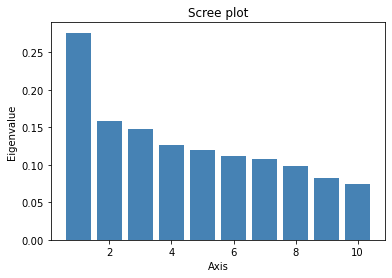

In [ ]:
my_mca.plot_eigenvalues()

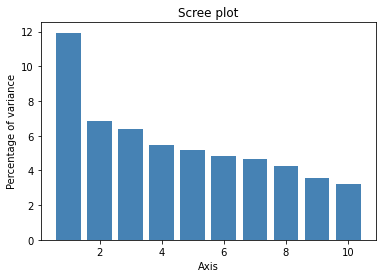

In [ ]:
my_mca.plot_eigenvalues(type="percentage")

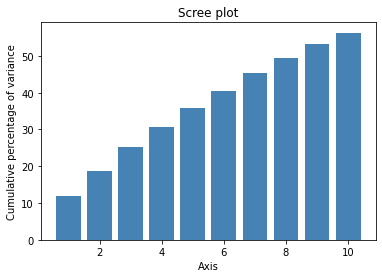

In [ ]:
my_mca.plot_eigenvalues(type="cumulative")

In [ ]:
df_rows = my_mca.row_topandas()
print( df_rows.iloc[0,0:10] )

row_coord_dim1     0.046622
row_coord_dim2    -0.097277
row_coord_dim3     0.354789
row_coord_dim4     0.673999
row_coord_dim5     0.291933
row_coord_dim6    -0.107621
row_coord_dim7     0.084339
row_coord_dim8     0.072869
row_coord_dim9    -0.448798
row_coord_dim10    0.010610
Name: 0000000101001347, dtype: float64


In [ ]:
df_cols = my_mca.col_topandas()
print(df_cols)

                      col_coord_dim1  col_coord_dim2  col_coord_dim3  \
TypeHabi_0                  0.268630       -0.116678        0.621024   
TypeHabi_1                 -0.092927        0.040362       -0.214830   
GeoFaz_Scl_0               -0.222212       -0.182943       -0.277373   
GeoFaz_Scl_1               -0.125894        0.165245       -0.467945   
GeoFaz_Scl_2                0.125573        0.108222       -0.127490   
GeoFaz_Scl_3                0.161950       -0.124839        0.682359   
GeoFaz_cl_0                -0.222212       -0.182943       -0.277373   
GeoFaz_cl_1                -0.128024        0.158752       -0.456673   
GeoFaz_cl_2                 0.082520        0.171201       -0.341933   
GeoFaz_cl_3                 0.166687       -0.118486        0.659066   
Anciennete_0               -0.019365        0.000879       -0.019668   
Anciennete_1                0.117462       -0.115905        0.135182   
Anciennete_2                0.073178       -0.069753        0.10

In [ ]:
X= my_mca.row_coord_
Data_init_cluster = pd.concat([data2_index, pd.DataFrame(X) ], axis=1)


In [ ]:
# Base de données qu'on obtient après l'ACM
Data_init_cluster


,IDENT,0,1,2,3,4,5,6,7,8,9
0,0000000101001347,0.046622,-0.097277,0.354789,0.673999,0.291933,-0.107621,0.084339,0.072869,-0.448798,0.010610
1,0000000201001512,0.090337,0.017418,0.314529,0.250750,-0.332026,0.277781,-0.010182,0.116536,0.346919,0.475768
2,0000000301002801,0.441592,0.377754,0.074296,-0.493401,0.221615,0.066322,0.262651,0.331505,-0.118942,-0.400502
3,0000000401003186,-0.809707,0.358911,0.343535,0.313257,0.234489,-0.420872,-0.588036,-0.135372,0.165778,0.047706
4,0000000501003624,-0.849004,0.457834,0.327254,0.207930,0.409973,-0.480507,-0.359971,-0.201837,0.272447,0.040847
...,...,...,...,...,...,...,...,...,...,...,...
484517,0048451804239260,-0.026285,0.734979,0.576528,0.017517,-0.168382,-0.356908,-0.023396,-0.029704,-0.421312,0.094051
484518,0048451904239261,-0.163958,-0.035099,0.204125,0.492542,0.807532,-0.665410,-0.317397,-0.193021,-0.655210,0.223999
484519,0048452004239262,-0.655607,0.483958,0.242641,0.250480,0.092383,-0.320617,0.381115,-0.630738,-0.281806,0.124288
484520,0048452104239263,-0.227672,0.662409,0.333383,-0.304932,0.379604,-0.650468,-0.523722,-0.116953,-0.516605,0.148497


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# la courbe de l’inertie intra-classe en fonction de i (nombre de classes)
'''
a=[]
for i in range(2,150):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(Data_init_cluster.iloc[:,1:]) 
    a.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.scatter(range(2,150),a)
'''

'\na=[]\nfor i in range(2,150):\n    kmeans = KMeans(n_clusters=i) \n    kmeans.fit(Data_init_cluster.iloc[:,1:]) \n    a.append(kmeans.inertia_)\nplt.figure(figsize=(10,5))\nplt.scatter(range(2,150),a)\n'

In [ ]:
'''
n_cluster = 8 : nombre de clusters finaux
algorithm= full : critère EM
n_init = 10 : nombre de partion
init='k-means++' :  choix des points de manière intelligente

'''
n_clusters_first=1000
model = KMeans(n_clusters = n_clusters_first,init='k-means++', n_init=3, max_iter=10, tol = 0.05,algorithm ="full" )
print(model)

KMeans(algorithm='full', max_iter=10, n_clusters=1000, n_init=3, tol=0.05)


In [ ]:
model.fit(Data_init_cluster.iloc[:,1:])
# les classes après kmeans
new_labels_kmeans = model.predict(Data_init_cluster.iloc[:,1:])
print(new_labels_kmeans)
print(model.n_iter_)
#np.array(np.unique(new_labels_kmeans, return_counts=True)).T

In [ ]:
#nombre d'individus dans chaque groupe
nb_after_kmeans = np.array(np.unique( model.predict(Data_init_cluster.iloc[:,1:]) , return_counts=True)).T
nb_after_kmeans

In [ ]:
# centre de gravité
model.cluster_centers_

In [ ]:
#Dataframe contenant les classes de tous les individus
df_resultat_kmeans = pd.DataFrame(new_labels_kmeans ,columns=["class_kmeans"] )# , dtype=int )
#Dataframe contenant les identifiants et les classes de tous les individus 
ident_class_kmeans = pd.concat([data2_index, df_resultat_kmeans], axis=1 ) #data2_index
ident_class_kmeans


In [ ]:
#pondération du centre de gravité de chacun des clusters
Data_init_classi = model.cluster_centers_*(nb_after_kmeans[:,1].reshape(n_clusters_first,1))
Data_init_classi

array([[-4.71521581e+03,  1.78866851e+03,  1.51644749e+03, ...,
        -1.11404450e+03,  4.03595963e+02,  2.16299351e+02],
       [ 1.99935560e+03, -8.70813563e+02,  9.96049344e+02, ...,
        -2.50275266e+03, -2.72226248e+02,  8.16350190e+01],
       [-2.89841791e+03, -3.55759072e+03,  4.47168273e+02, ...,
         8.39328270e+02,  5.85464725e+01,  1.65574024e+03],
       ...,
       [-9.16454153e+01,  1.21936148e+03, -6.67747649e+02, ...,
        -9.40452270e+02, -1.25167124e+03,  2.41981383e+02],
       [-2.61556525e+02,  6.85205969e+02,  2.94321003e+02, ...,
        -1.79831258e+02, -6.09386141e+02,  9.07957523e+01],
       [-2.77880017e+00,  1.11106601e+03, -1.28643336e+03, ...,
         4.34062517e+02, -1.20332482e+03, -1.48908689e+02]])

In [ ]:
#Dataframe de la pondération du centre de gravité de chacun des clusters
Data_init_classi = pd.DataFrame(Data_init_classi)
Data_init_classi

,0,1,2,3,4,5,6,7,8,9
0,-4715.215805,1788.668511,1516.447489,454.508855,2798.787135,-2831.606138,-2971.629804,-1114.044500,403.595963,216.299351
1,1999.355598,-870.813563,996.049344,1527.995208,1249.699451,-524.396044,1724.964094,-2502.752658,-272.226248,81.635019
2,-2898.417914,-3557.590723,447.168273,-1084.091000,-2833.854363,2889.994348,-840.408490,839.328270,58.546473,1655.740240
3,5487.403738,2037.038855,908.378471,-1338.664590,-3101.173817,2378.440749,-1751.271053,1204.264042,112.604588,3209.174735
4,2392.450291,-1216.458687,1081.644920,1354.694356,3210.333572,-1422.738429,2601.430341,1110.111806,9.077686,121.293353
5,584.299730,367.038211,-127.825731,-428.998670,43.365706,248.133361,230.725741,-288.300762,-99.546205,-169.353472
6,-2282.756395,1466.760053,590.414258,1664.134499,-591.927176,1114.011951,-745.138518,509.723173,-517.356227,-1399.188293
7,-3709.413381,2435.455941,-95.316606,814.547421,1359.889352,-639.275234,1628.676034,1412.939493,-277.233961,-291.106251
8,1481.660642,563.535388,-126.793358,-1365.426175,1114.840649,260.165654,-1790.577339,-271.111873,56.032070,-1235.145735
9,1513.132088,734.625683,1463.042115,-633.805311,-542.970734,-238.276609,117.729728,-450.785726,-114.737661,2.933011


In [ ]:
#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


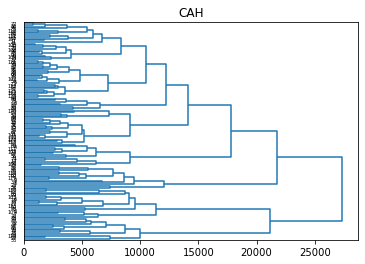

In [ ]:
#générer la matrice des liens
Z = linkage(Data_init_classi,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Data_init_classi.index,orientation='right',color_threshold=1)
plt.show()


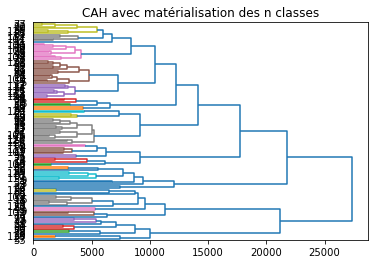

[10 26  6 18 28 36 11  8 34 20 29 38 36 29 25 33 36 11 11 27  4 29 39 23
 31  3 16  1 34 15 21 29 17  2 19 39 11 37  7 36 37 40 24 10 35 37 29  6
 36 30 12 35 29 30 35 22 26 29 35 36  5 38 29 13 36 14 25 29 30 28 37 36
  5  9 25 29  8 39 37  3 33 39 21 20 32 39 29 36 34 32 39  5 20  6 37 36
 37 27 36 36 37 27 36 11 37 29 24 38 37  8 13 27 38 11 20 29 39 35  1 20
 31 36 35 29 35 35 29]
[ 27 118  33  79  25  20  91  72  60   2  47  93  38 109   7  76  73  43
   0  17  18 103   6  36 113  50 110  63  65  29  26  32   3  34  92 114
 119   9  83  82  30  55  23 106  42  66  14  74   1  56  97 111  19 101
  69   4  86  67  75  62  10  13 126  57  31 123 115  21  46 105  52  49
  53  68 120  24  89  84  15  80  88   8  28 117 124  54  58 122 125  44
  51  98  39 102  99  59  48  95 121  64  71  87  12   5  16 108  45 104
 100  96  94  70  78  37  40  11 112 107  61 116  22  81  90  35  85  77
  41]
      0
1    27
1   118
2    33
3    79
3    25
4    20
5    91
5    72
5    60
6     2
6    47

In [ ]:
''' FAIRE ATTENTION A CETTE ETAPE CAR IL FAUT CHOISIR LA COUPURE (t et color_threshold changent) '''

#matérialisation des n classes (hauteur t = 7)
plt.title('CAH avec matérialisation des n classes')
dendrogram(Z,labels=Data_init_classi.index,orientation='right',color_threshold=5450,leaf_font_size=10)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de n groupes obtenus
groupes_cah = fcluster(Z,t=5450,criterion='distance', depth=5000)
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
print(idg)
#affichage des observations et leurs groupes
print(pd.DataFrame(Data_init_classi.index[idg],groupes_cah[idg]))


In [ ]:
#Dataframe qui relie les classes obtenues du kmeans et celles de la cah
a = pd.DataFrame( Data_init_classi.index[idg], columns=["class_kmeans"])
b = pd.DataFrame( groupes_cah[idg], columns = ["class_cah"])
link_class_kmeans_cah = pd.concat([a, b], axis=1 ) 
link_class_kmeans_cah


,class_kmeans,class_cah
0,27,1
1,118,1
2,33,2
3,79,3
4,25,3
5,20,4
6,91,5
7,72,5
8,60,5
9,2,6


In [ ]:
# nombre de madalités du kmeans dans chacune de classes de la cah
link_class_kmeans_cah["class_cah"].value_counts()


29    15
36    14
37    10
35     8
39     7
11     6
20     5
38     4
27     4
34     3
30     3
25     3
8      3
6      3
5      3
33     2
32     2
31     2
24     2
28     2
26     2
1      2
21     2
13     2
3      2
10     2
23     1
4      1
7      1
9      1
12     1
14     1
22     1
15     1
16     1
17     1
18     1
19     1
2      1
40     1
Name: class_cah, dtype: int64

In [ ]:
# A REVOIR, INDEX
points_init=pd.DataFrame(model.cluster_centers_)
points_init

,0,1,2,3,4,5,6,7,8,9
0,-0.737905,0.279917,0.237316,0.071128,0.437995,-0.443131,-0.465044,-0.174342,0.063161,0.033850
1,0.506679,-0.220683,0.252420,0.387226,0.316700,-0.132893,0.437142,-0.634251,-0.068988,0.020688
2,-0.459993,-0.564607,0.070968,-0.172051,-0.449747,0.458656,-0.133377,0.133206,0.009292,0.262774
3,0.662330,0.245871,0.109641,-0.161577,-0.374312,0.287078,-0.211379,0.145355,0.013591,0.387348
4,0.463833,-0.235839,0.209702,0.262639,0.622399,-0.275831,0.504349,0.215221,0.001760,0.023516
5,0.560748,0.352244,-0.122673,-0.411707,0.041618,0.238132,0.221426,-0.276680,-0.095534,-0.162527
6,-0.636220,0.408796,0.164552,0.463806,-0.164974,0.310483,-0.207675,0.142063,-0.144191,-0.389963
7,-0.709257,0.465670,-0.018225,0.155745,0.260017,-0.122232,0.311410,0.270161,-0.053008,-0.055661
8,0.523740,0.199200,-0.044819,-0.482653,0.394076,0.091964,-0.632936,-0.095833,0.019806,-0.436602
9,0.580411,0.281790,0.561198,-0.243117,-0.208274,-0.091399,0.045159,-0.172914,-0.044011,0.001125


In [ ]:
# les identifiants et les classes auxquelles ils appartient à la suite du kmeans et de la cah 
ident_class_kmeans_cah=ident_class_kmeans
ident_class_kmeans_cah=pd.merge(ident_class_kmeans_cah, link_class_kmeans_cah)
ident_class_kmeans_cah

,IDENT,class_kmeans,class_cah
0,0000000101001347,64,36
1,0000016601084930,64,36
2,0000018501091528,64,36
3,0000020601107238,64,36
4,0000048201237168,64,36
...,...,...,...
484517,0046543604214133,57,29
484518,0046552804214515,57,29
484519,0046573104215147,57,29
484520,0046579404215390,57,29


In [ ]:
#création des centres de gravité de chacune des classes obtenues à partir du cah
#ajouter manuellement la liste de liste par rapport au nombre de classes sollicité
#les centres de gravité ne sont pas pondérés 
#les groupes du cah sont numérotés à partir de 1 
# il faut ajouter autant des listes à l'intérieur de la liste principale ci-dessous qu'on veut de groupes
points_init_kmeans_final=[[],[],[],[],[],[],[],[],[],[],
                         [],[],[],[],[],[],[],[],[],[],
                         [],[],[],[],[],[],[],[],[],[],
                         [],[],[],[],[],[],[],[],[],[]]
for k in range(1,len(link_class_kmeans_cah.iloc[:,1].value_counts())+1):
    bbb=link_class_kmeans_cah[link_class_kmeans_cah["class_cah"] ==k] 
    #print(bbb)
    for i in bbb["class_kmeans"]:
        #print("i : ",i); print("")
        points_init_kmeans_final[k-1].append(points_init[points_init.index ==i])
    points_init_kmeans_final[k-1] = np.mean(points_init_kmeans_final[k-1], axis=0).tolist()
#conversion de la liste d'array en array uniquement et suppression d'une dimension (car il en a 3)
points_init_kmeans_final=np.asarray(points_init_kmeans_final)[:,0,:]
points_init_kmeans_final

array([[-5.56973967e-01, -5.78424494e-01,  6.41104696e-01,
        -1.83349729e-01, -3.51649557e-01, -4.80762381e-03,
         3.12303035e-02,  5.72099930e-02,  3.25851026e-02,
         6.40782478e-02],
       [-6.33365756e-01, -4.77796559e-01,  2.48207779e-01,
        -4.78994722e-01,  1.12516684e-01, -1.48736666e-01,
         4.71189945e-01,  2.24260948e-01,  7.11548636e-02,
         3.17676050e-02],
       [-5.81278808e-01, -5.70896054e-01, -1.78183542e-01,
        -4.99775169e-01,  2.21238879e-01,  1.94287523e-01,
        -5.40333672e-01, -1.22028293e-01,  1.01048514e-01,
        -8.14525923e-02],
       [-6.54058282e-01, -5.80410058e-01,  3.10854110e-01,
        -5.12259615e-01,  2.79139647e-01, -2.98924402e-01,
        -3.70338165e-01, -1.94024458e-01,  1.65264959e-01,
         4.69307845e-02],
       [-5.28707035e-01, -4.77352106e-01, -2.03884391e-02,
        -3.41943700e-01, -2.06152803e-01,  2.86825666e-01,
         3.00486942e-01, -5.68455440e-01, -5.05020597e-02,
        -5.

In [ ]:
'''
n_cluster = 7 : nombre de clusters finaux
algorithm= full : critère EM
n_init = 1 : nombre de partion
init= np.array :  choix des points

'''
n_clusters_first=40
model_kmeans_final = KMeans(n_clusters = n_clusters_first,init=points_init_kmeans_final, n_init=1, max_iter=10, tol = 0.05,algorithm ="full" )
print(model_kmeans_final)

KMeans(algorithm='full',
       init=array([[-5.56973967e-01, -5.78424494e-01,  6.41104696e-01,
        -1.83349729e-01, -3.51649557e-01, -4.80762381e-03,
         3.12303035e-02,  5.72099930e-02,  3.25851026e-02,
         6.40782478e-02],
       [-6.33365756e-01, -4.77796559e-01,  2.48207779e-01,
        -4.78994722e-01,  1.12516684e-01, -1.48736666e-01,
         4.71189945e-01,  2.24260948e-01,  7.11548636e-02,
         3.17676050e-02],
       [...
       [-8.45113152e-02,  1.46588780e-01,  4.93320542e-02,
         1.45471045e-02,  1.20544902e-01,  1.07477234e-01,
         3.53674457e-01, -2.36993224e-01,  4.02971089e-01,
        -1.33923382e-01],
       [-6.34444542e-02,  1.49536510e-01, -3.37487698e-01,
        -4.35414521e-02,  1.80833623e-01,  2.63849049e-01,
         2.96299235e-01,  2.75232556e-01,  4.91830546e-01,
         2.11205471e-01]]),
       max_iter=10, n_clusters=40, n_init=1, tol=0.05)


In [ ]:
model_kmeans_final.fit(Data_init_cluster.iloc[:,1:])
new_labels_kmeans_final= model_kmeans_final.predict(Data_init_cluster.iloc[:,1:])
print(new_labels_kmeans_final)
print(model_kmeans_final.n_iter_)

[23 37 21 ... 10 34 39]
6


In [ ]:
#Dataframe contenant les classes de tous les individus
df_resultat_kmeans_final = pd.DataFrame(new_labels_kmeans_final ,columns=["class_kmeans_final"] )# , dtype=int )
#Dataframe contenant les identifiants et les classes de tous les individus 
ident_class_kmeans_final = pd.concat([data2_index, df_resultat_kmeans_final], axis=1 ) #data2_index
ident_class_kmeans_final


,IDENT,class_kmeans_final
0,0000000101001347,23
1,0000000201001512,37
2,0000000301002801,21
3,0000000401003186,9
4,0000000501003624,9
...,...,...
484517,0048451804239260,34
484518,0048451904239261,32
484519,0048452004239262,10
484520,0048452104239263,34


In [ ]:
# les identifiants et les classes auxquelles ils appartient à la suite du kmeans,de la cah
# et du kmeans_final
ident_class_kmeans_cah_kmeans_final=pd.merge(ident_class_kmeans_cah,ident_class_kmeans_final)
ident_class_kmeans_cah_kmeans_final

,IDENT,class_kmeans,class_cah,class_kmeans_final
0,0000000101001347,64,36,23
1,0000016601084930,64,36,23
2,0000018501091528,64,36,12
3,0000020601107238,64,36,7
4,0000048201237168,64,36,7
...,...,...,...,...
484517,0046543604214133,57,29,28
484518,0046552804214515,57,29,4
484519,0046573104215147,57,29,4
484520,0046579404215390,57,29,28


In [ ]:
ident_class_kmeans_cah_kmeans_final["class_cah"].value_counts()

29    35964
36    25606
37    21518
39    21010
11    19241
20    19227
35    18567
8     17525
25    15859
6     14842
38    14029
21    12069
1     12029
10    11473
24    11393
30    11367
27    11040
32    10766
13    10738
16    10476
28    10272
5     10215
31     9862
26     9047
15     9039
23     8939
17     8352
18     8285
2      8271
34     8020
33     7925
9      7880
3      7834
14     7721
40     6905
19     6892
7      6703
4      6436
12     6257
22     4928
Name: class_cah, dtype: int64

In [ ]:
ident_class_kmeans_cah_kmeans_final["class_kmeans_final"].value_counts()

9     20004
39    18010
14    17863
8     17522
34    16503
24    16388
30    16156
22    16054
17    15083
12    14798
28    14623
7     14317
31    14086
6     13220
37    12823
0     12691
27    12665
5     12246
25    11856
38    11794
4     11631
23    11585
18    11468
29    11325
35    11244
11    11215
15    11140
32    11029
36     9907
2      9779
1      9259
16     8706
10     8506
20     8273
13     8250
19     7783
33     7503
3      7178
21     5475
26     4564
Name: class_kmeans_final, dtype: int64

In [ ]:
# A VOIR SI CA SERT
( (ident_class_kmeans_cah_kmeans_final["class_cah"]-(ident_class_kmeans_cah_kmeans_final["class_kmeans_final"]+1))!=0 ).sum()

121761

In [ ]:
# identfiants avec huit premiers caractères (Même référence, modifier après )
ident_huit_carac_class_kmeans_cah_kmeans_final = ident_class_kmeans_cah_kmeans_final
for i in range(ident_huit_carac_class_kmeans_cah_kmeans_final.shape[0]) :
    ident_huit_carac_class_kmeans_cah_kmeans_final.iloc[i,0] = ident_huit_carac_class_kmeans_cah_kmeans_final.iloc[i,0][0:8]
ident_huit_carac_class_kmeans_cah_kmeans_final

KeyboardInterrupt: 

In [ ]:
tableau_resultat = confusion_matrix(ident_huit_carac_class_kmeans_cah_kmeans_final["class_cah"],ident_huit_carac_class_kmeans_cah_kmeans_final["class_kmeans_final"]+1)
pd.DataFrame(tableau_resultat)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,11778,0,0,0,25,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,8108,0,0,3,0,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,7808,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,140,6296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,231,0,0,9735,79,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,48,108,0,0,30,10590,4063,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
6,0,25,0,0,8,0,6670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,13136,4278,0,74,1,0,0,2,0,0,0,0,0,0,2,0,0,0,0,11,0,0,0,0,0,0,0,5,0,0,0,0,16
8,0,0,0,0,0,0,0,0,7858,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9,0,0,0,143,0,0,0,0,0,11320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,0,0,0


In [ ]:
np.diagonal(tableau_resultat).sum()/484522

0.7486987174988958